Enter the value of k: 3
Enter the value of defective square row position: 2
Enter the value of defective square column position: 2


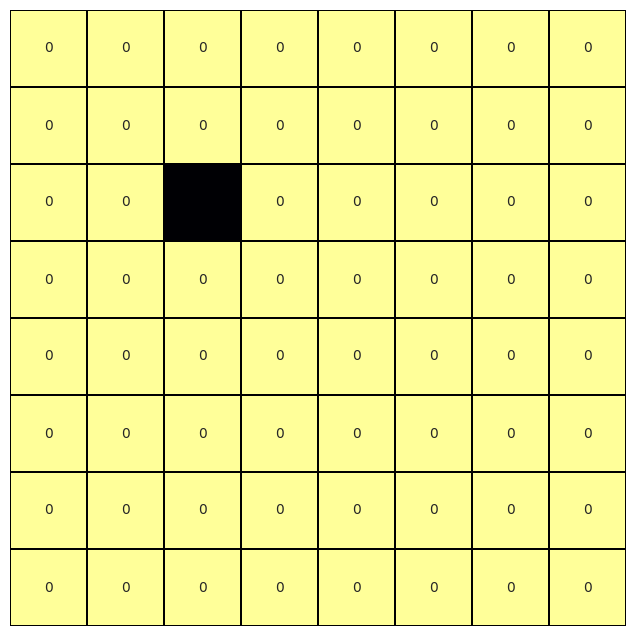

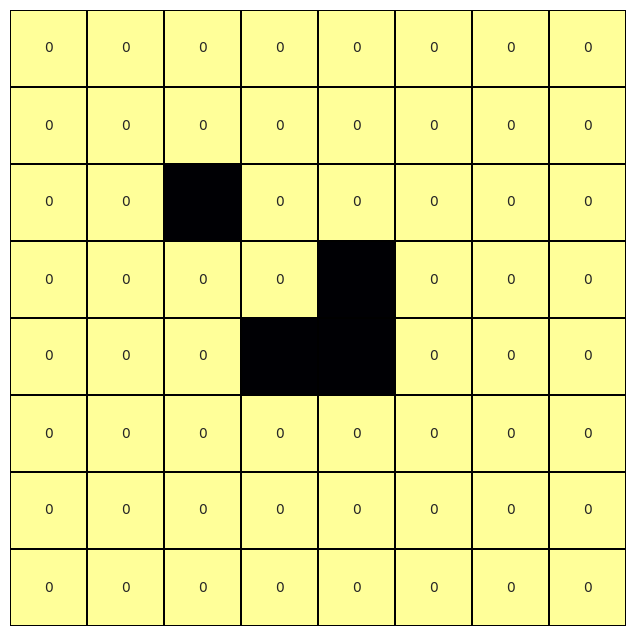

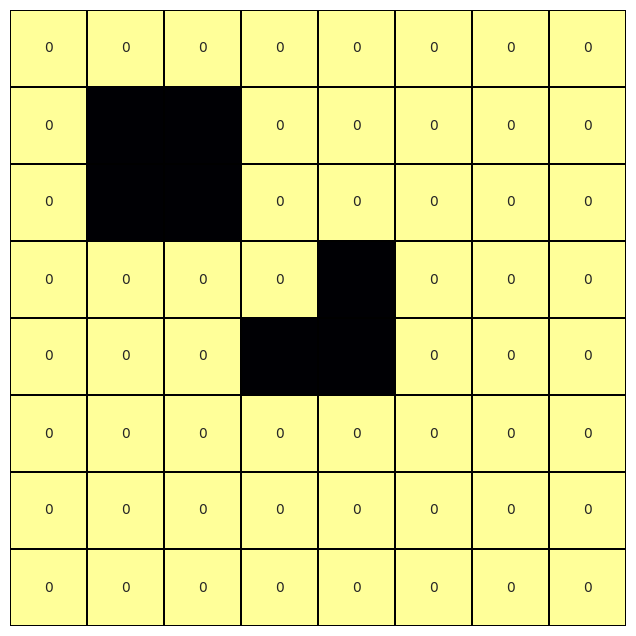

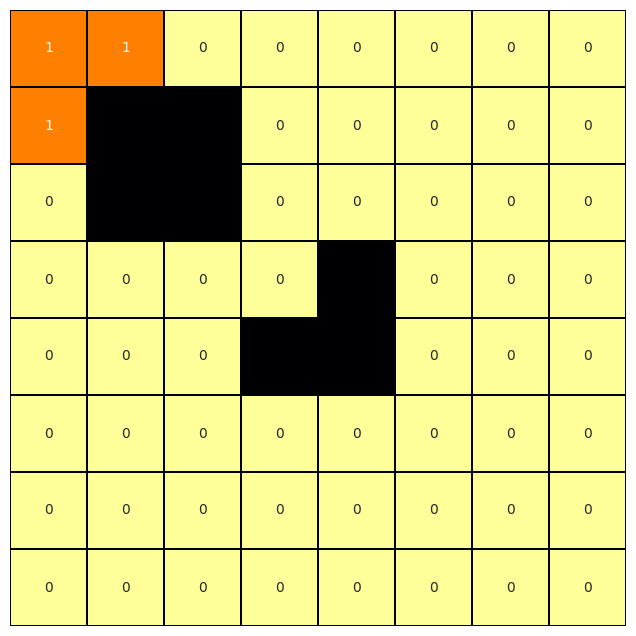

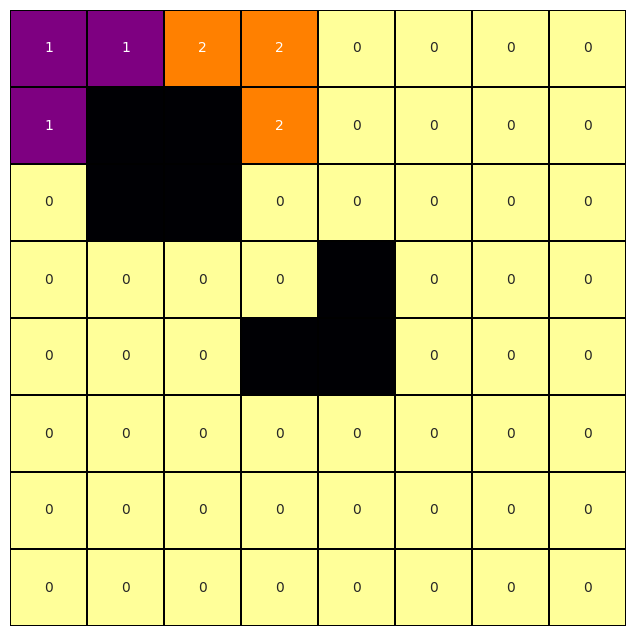

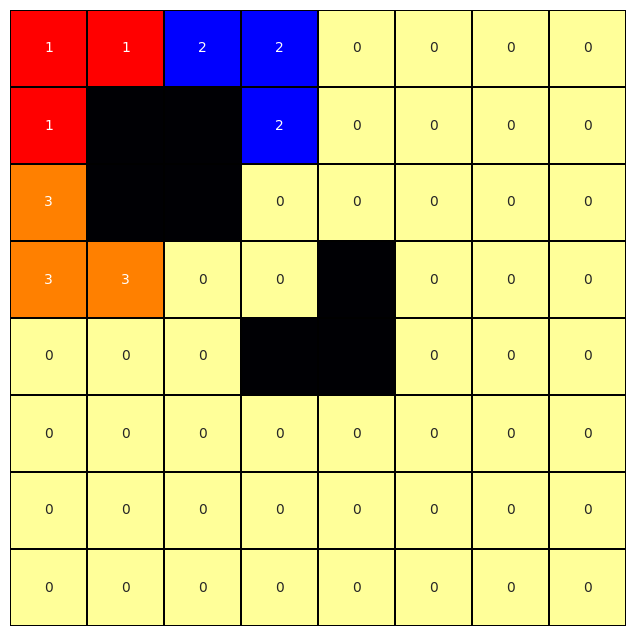

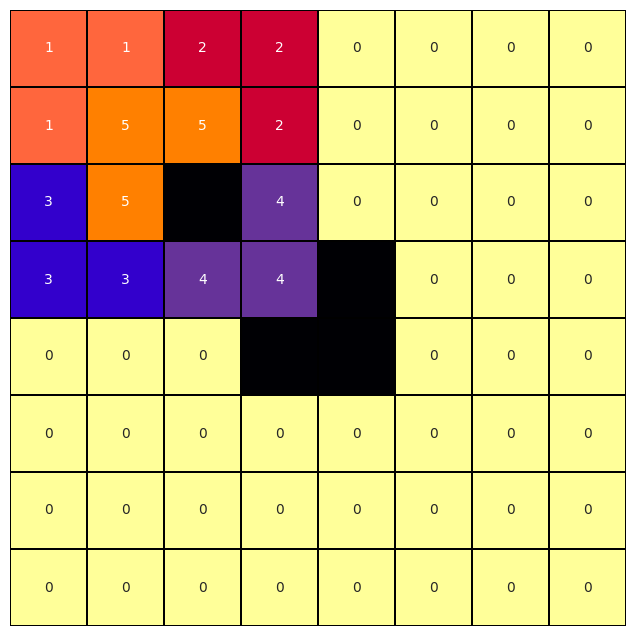

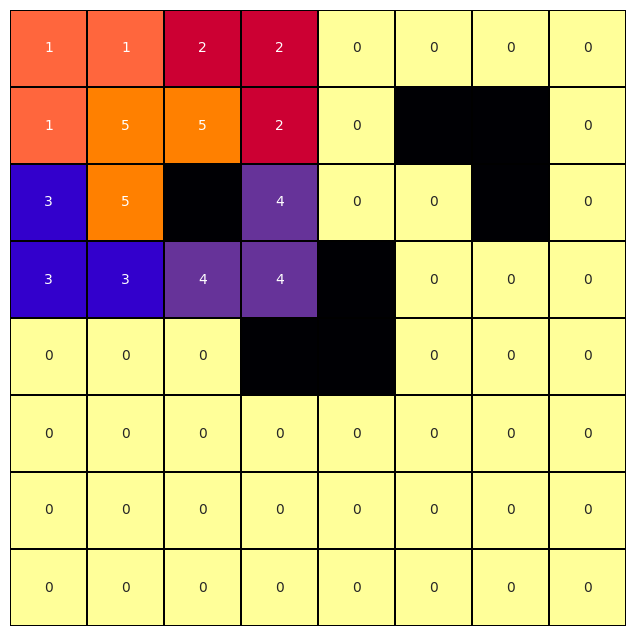

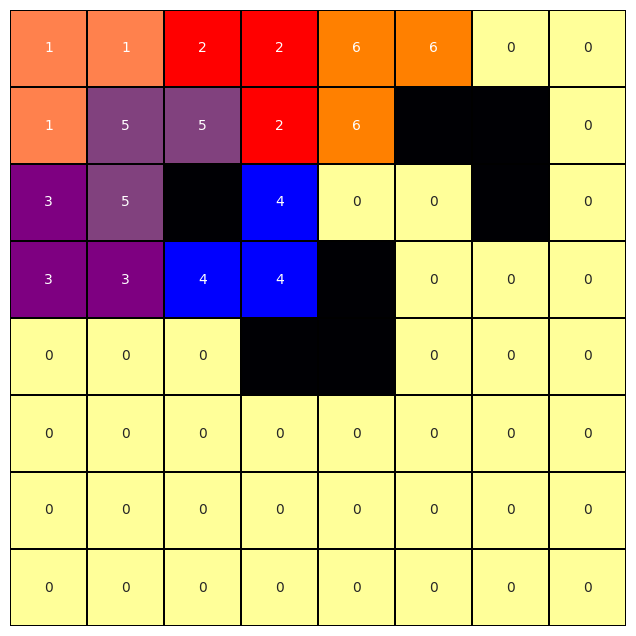

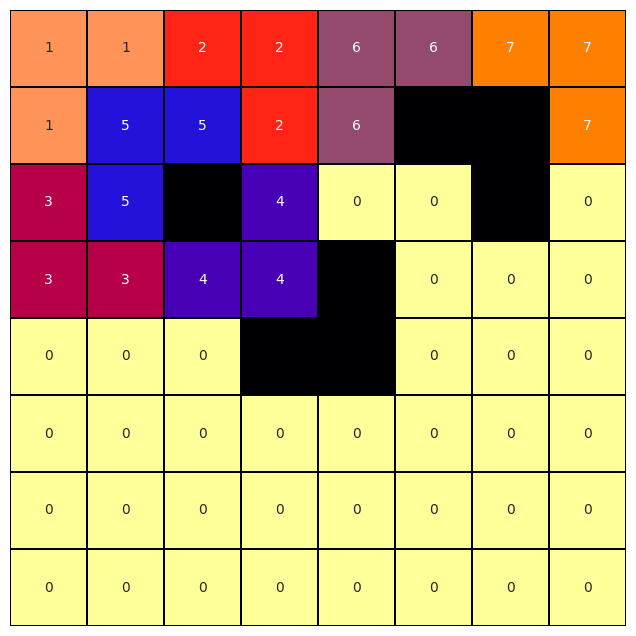

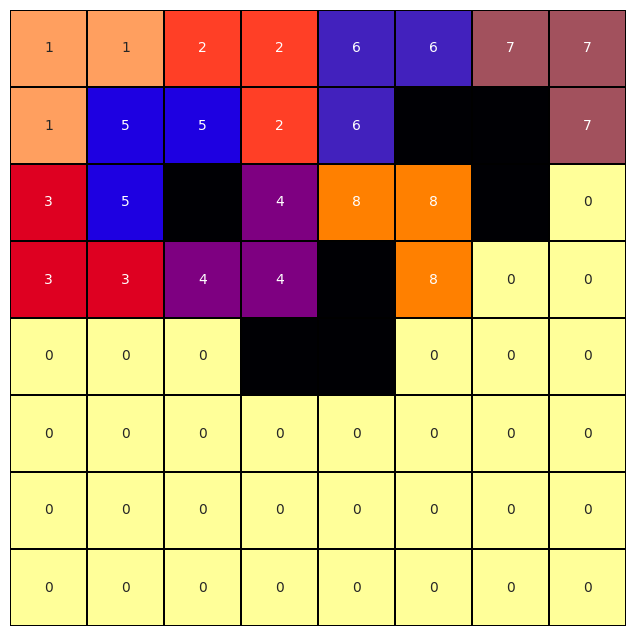

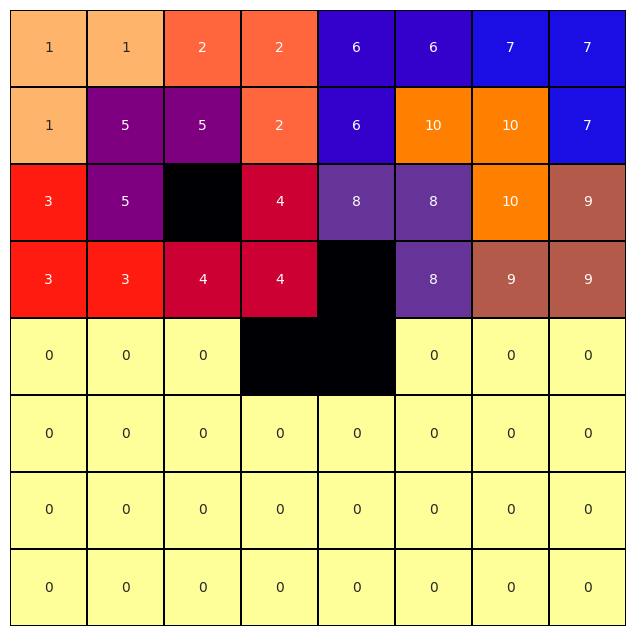

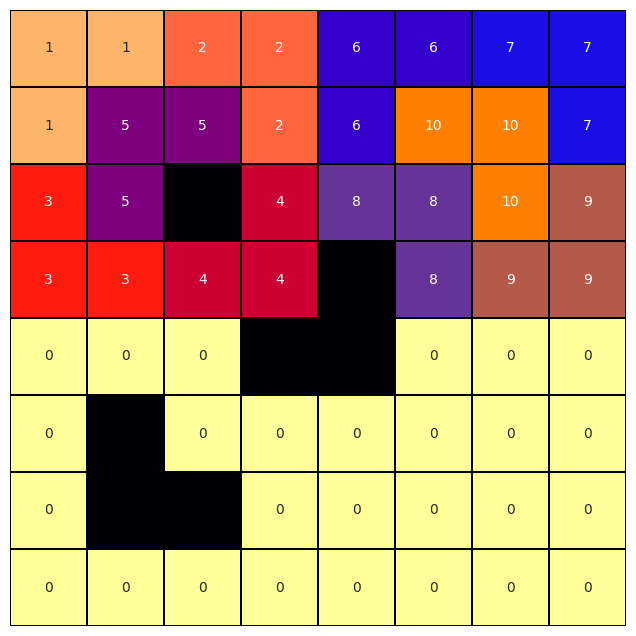

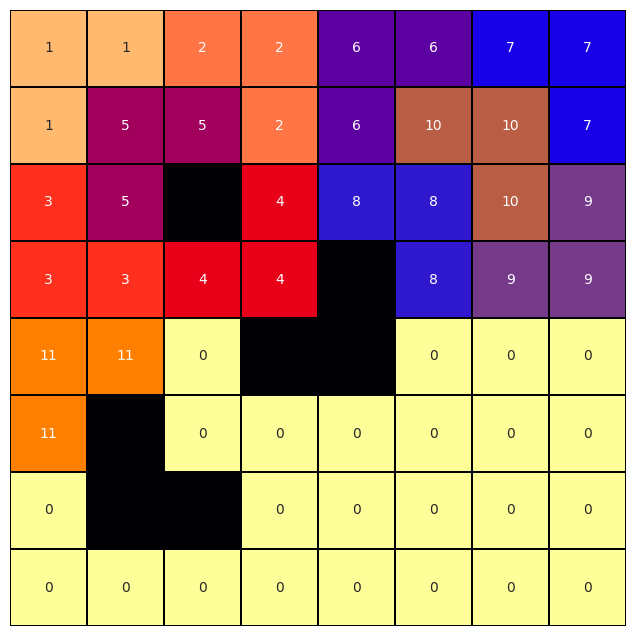

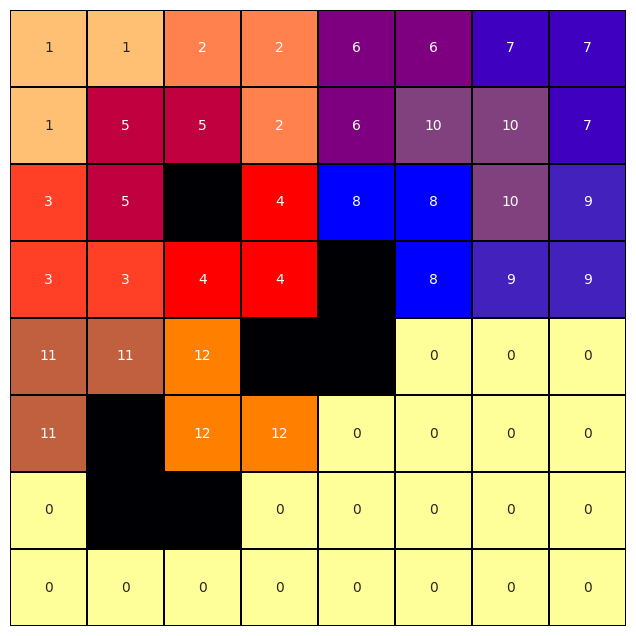

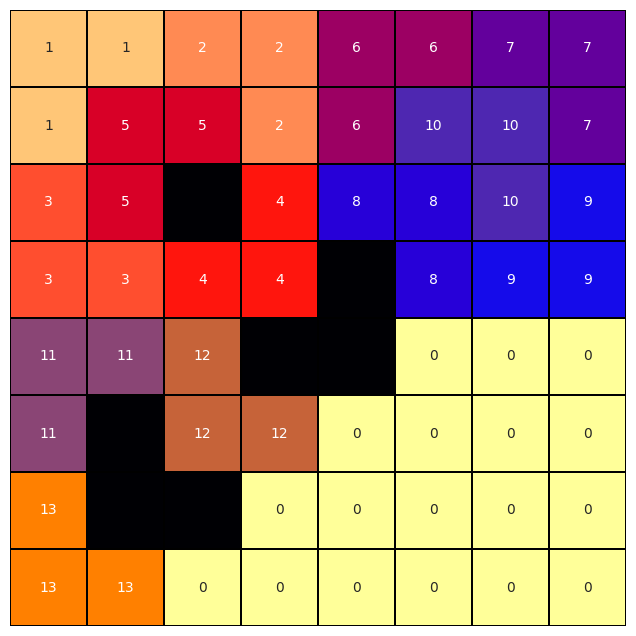

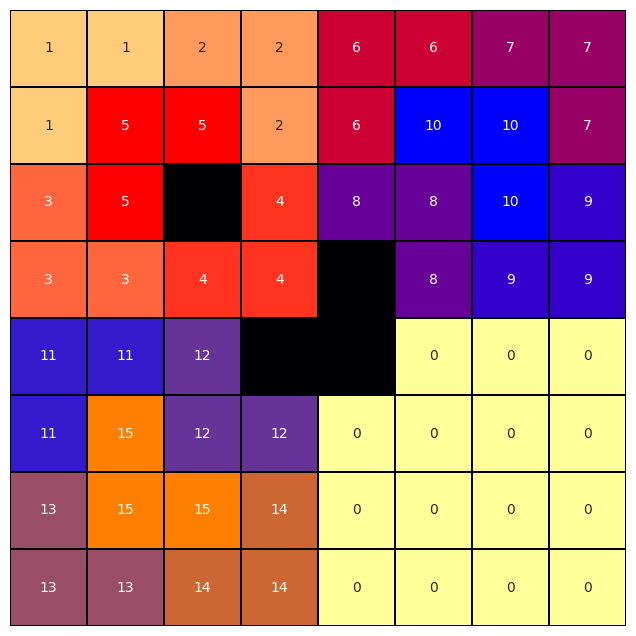

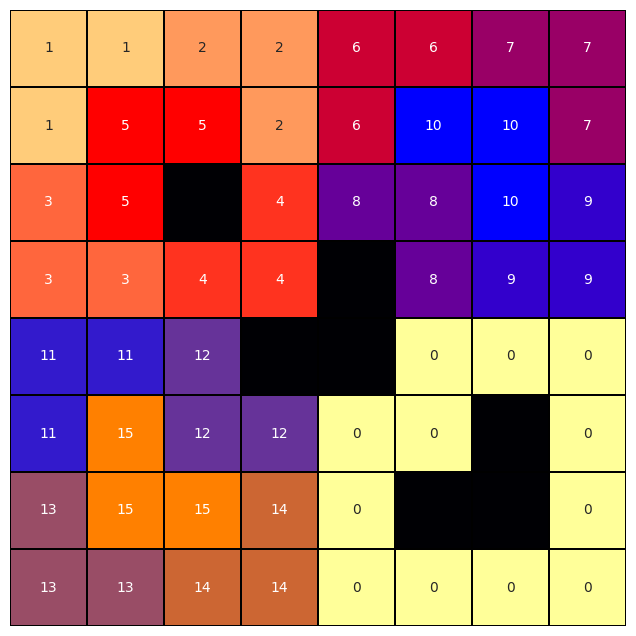

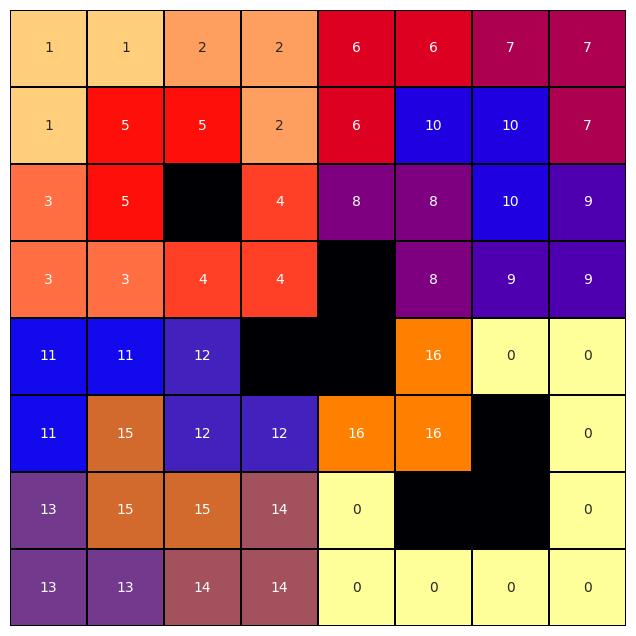

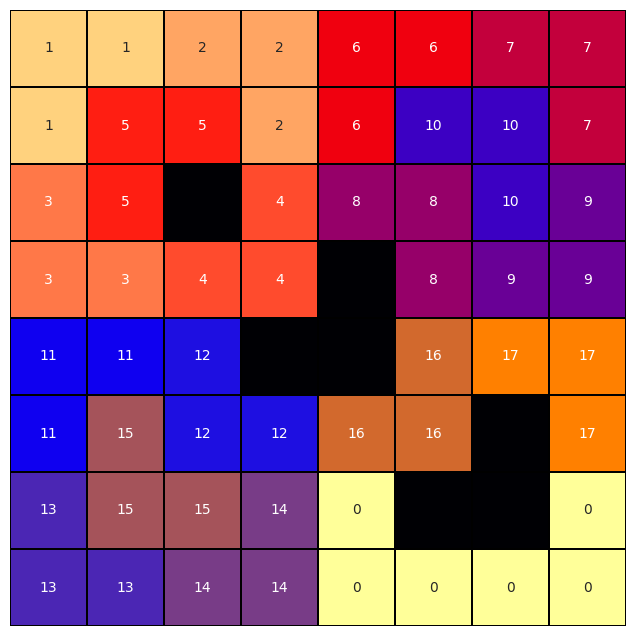

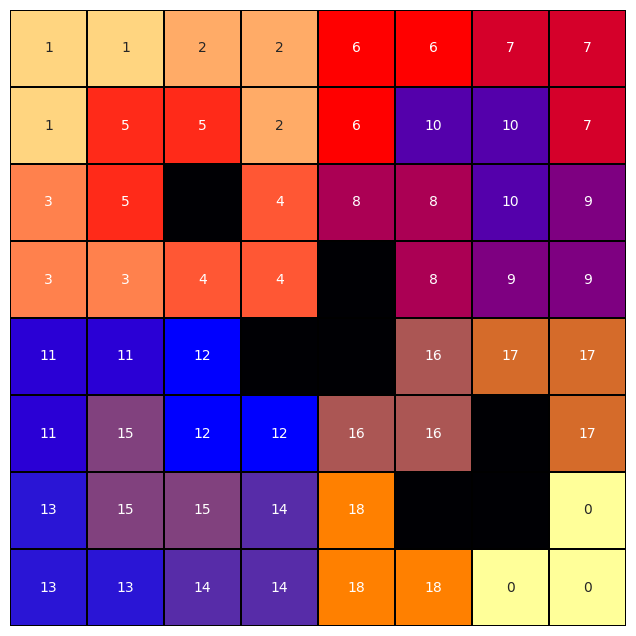

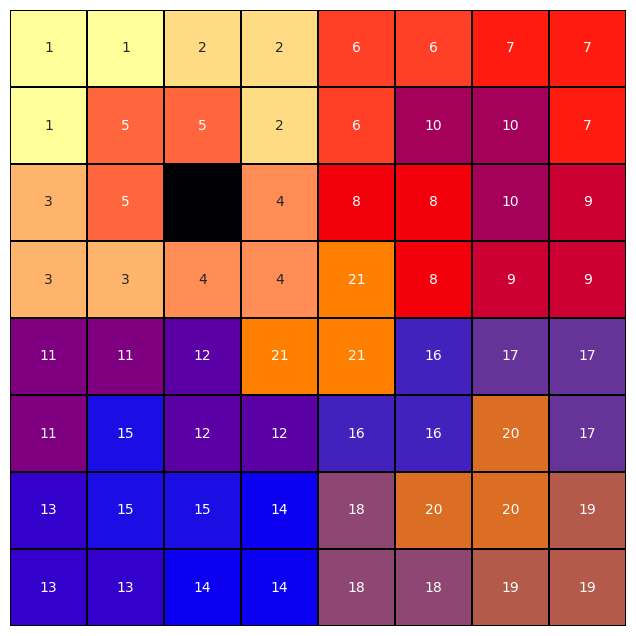

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from matplotlib.colors import LinearSegmentedColormap


def createboard(k):
  '''
  k: represents the size of the board.
      Number of squares on the board = 2^k * 2^k
  '''

  rows = [[] for i in range(2**k)]
  for i in range(2**k):
      rows[i] = [0] * 2**k
  return rows
def add_defect(board,r,cl):
  len_ = len(board)
  row = r
  col = cl

  board[row][col] = -1
def locate_defect(board, r1, c1, r2, c2):
  '''
  (r1, c1): row, column number of upper left square of board
  (r2, c2): row, column number of lower right square
  '''

  # find defective elem
  r = 0
  c = 0
  loc_ = []
  for i in range(r1, r2 + 1):
      loc_[:] = board[i][c1:c2 + 1]
      if -1 in loc_:
          c = loc_.index(-1) + c1
          r = i
          break
  # top
  if r <= r1 + (r2 - r1) // 2:
      # left
      if c <= c1 + (c2 - c1) // 2:
          return 0, r, c
      # right
      else:
          return 1, r, c

  # bottom
  else:
      # left
      if c <= c1 + (c2 - c1) // 2:
          return 2, r, c
      # right
      else:
          return 3, r, c
def add_trionimo(board, defect, r1, c1, r2, c2):
  '''
  defect: integer between 0-3 representing which quadrant of the
      board the defect lies in.
      0: top-left
      1: top-right
      2: bottom-left
      3: bottom-right
  '''
  global num_tri
  dict_ = {
       0: (r1, c1),
       1: (r1, c2),
       2: (r2, c1),
       3: (r2, c2),
  }

  num_tri += 1
  for i in range(r1, r2 + 1):
      board[i][c1:c2+1] = [num_tri]*(c2-c1 + 1)

  rd, cd = dict_[defect]
  board[rd][cd] = -1
def tile_rec(board, r1, c1, r2, c2):

  global num_tri
  # centre coordinates
  dict_ = {
          0: (r1 + (r2 - r1)//2, c1 + (c2 - c1)//2),
          1: (r1 + (r2 - r1)//2, c1 + (c2 - c1)//2 + 1),
          2: (r1 + (r2 - r1)//2 + 1, c1 + (c2 - c1)//2),
          3: (r1 + (r2 - r1)//2 + 1, c1 + (c2 - c1)//2 + 1)
      }

  # locate defect quadrant
  drawboard(board)
  defect, r, c = locate_defect(board, r1, c1, r2, c2)

  # if board size == 2 x 2
  if (r1 == r2 - 1) and (c1 == c2 - 1):
      add_trionimo(board, defect, r1, c1, r2, c2)
      return None

  else:
      # add defect to centres
      redo = True
      for value in dict_.values():
          if board[value[0]][value[1]] == 0:
              board[value[0]][value[1]] = -1
          else:
              redo = False
      if redo:
          board[dict_[defect][0]][dict_[defect][1]] = 0

      # solving the four sub-problems: each of the four quadrants
      tile_rec(board, r1, c1, r1 + (r2-r1)//2, c1 + (c2 - c1)//2),
      tile_rec(board, r1, c1 + (c2 - c1)//2 + 1, r1 + (r2-r1)//2, c2),
      tile_rec(board, r1 + (r2-r1)//2 + 1, c1, r2, c1 + (c2 - c1)//2),
      tile_rec(board, r1 + (r2-r1)//2 + 1, c1 + (c2 - c1)//2 + 1, r2, c2)

      # add last trionimo to cover defects
      num_tri += 1

      # assume that first defect was centre
      redo = True
      for value in dict_.values():
          if board[value[0]][value[1]] == -1:
              board[value[0]][value[1]] = num_tri
          else:
              redo = False
      if redo:
          board[dict_[defect][0]][dict_[defect][1]] = -1
def tile(board, k):
  '''
  k: represents the size of the board.
      Number of squares on the board = 2^k * 2^k
  '''

  tile_rec(board, 0, 0, 2**k - 1, 2**k - 1)
  drawboard(board)
  return board

# Define custom colors
colors = [(1, 1, 0.6),  # Light body color
          (1, 0, 0),    # Bright red
          (0, 0, 1),    # Bright blue
          (1, 0.5, 0)]  # Bright orange

# Create a colormap object
custom_cmap = LinearSegmentedColormap.from_list("custom_colormap", colors, N=256)
def drawboard(board, size=(8, 8), annot=True):
    '''
    size: size of plot
    annot: if true, displays the number of the trionimo a particular
        square belongs to.
    '''

    plt.figure(figsize=size)
    sns.heatmap(board, linewidths=.1, linecolor='black',
                annot=False, cmap='magma', yticklabels=False,
                xticklabels=False, cbar=False, square=True);

    sns.heatmap(board, linewidths=.1, linecolor='black',
                annot=annot, cmap=custom_cmap,yticklabels=False,
                xticklabels=False, cbar=False, square=True,
                mask=np.array(board)<0);
    plt.show()

k = int(input("Enter the value of k:"))
r = int(input("Enter the value of defective square row position:"))
c = int(input("Enter the value of defective square column position:"))              

# setting trionimo count to 0
# this allows us to display the count on the board
num_tri = 0

# creating a board of size 2^k * 2^k
board = createboard(k)

add_defect(board,r,c)

# tiling the board
board = tile(board, k)

# the tile function calls the drawboard(), allowing us
# to view the state of the board at each recursive call
